In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import random
from collections import Counter

C:\Users\humph\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#useful sources
#https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
#https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

In [3]:
#headache
#determine the number of clusters programaticaly, now is graphically
#select the biggest cluster

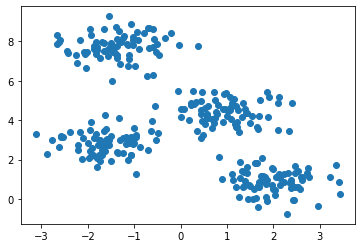

In [4]:
#make our own data using the make_blob 
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [5]:
len(y)

300

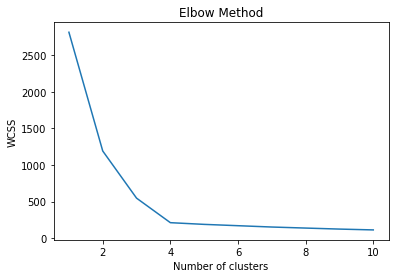

In [6]:
#determine the optimul number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
#in the above method called elbow method, we graph the within cluster sum of squares, WCSS against number of clusters
#and pick the number of clusters where the graph begins leveling off. 

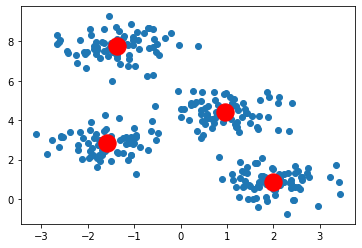

In [8]:
#determine the centroid for each cluster
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [9]:
pred_y

array([0, 2, 1, 2, 0, 0, 3, 1, 2, 2, 3, 2, 1, 2, 0, 1, 1, 0, 3, 3, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 1, 3, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 0, 2, 0, 0, 3, 2, 3, 2, 0, 2, 1, 2, 3, 3, 3,
       2, 0, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 1, 0, 2, 3, 3, 1, 0, 0, 1, 3, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       3, 3, 0, 2, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       3, 0, 2, 3, 3, 2, 1, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1,
       0, 3, 2, 3, 0, 1, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 3, 2,
       0, 0, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 2, 1, 3, 0, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 2, 3, 3, 0, 0, 1,
       2, 0, 0, 3, 0, 3, 1, 2, 2, 1, 1, 2, 1, 0, 3, 1, 0, 3, 2, 3, 0, 1,
       0, 2, 2, 2, 2, 3, 3, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0,
       2, 3, 1, 2, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 3])

In [10]:
centroids = kmeans.cluster_centers_

In [11]:
centroids

array([[ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263]])

In [12]:
#pick the largest cluster using the length of labels
labels =list(kmeans.labels_)

In [13]:
#get unique elements, and use as classes
classes = list(set(labels))
classes

[0, 1, 2, 3]

In [14]:
zeros = labels.count(classes[0])
zeros

75

In [15]:
ones = labels.count(classes[1])
ones

75

In [16]:
#oops, it seems its a perfect cluster sizes because we used make blobs, will test on other data and see

In [17]:
level_1 = []
for i in range(10):
    level_1.append([random.randrange(25,30)/100,random.randrange(360,365)/10])
    
level_1    

[[0.28, 36.2],
 [0.29, 36.1],
 [0.29, 36.0],
 [0.27, 36.4],
 [0.25, 36.3],
 [0.26, 36.1],
 [0.27, 36.2],
 [0.27, 36.4],
 [0.25, 36.4],
 [0.27, 36.2]]

In [18]:
level_2 = []
for i in range(100):
    level_2.append([-1*(random.randrange(120,128)/10),random.randrange(368,380)/10])
    
level_2    

[[-1.25, 37.3],
 [-1.23, 37.4],
 [-1.27, 37.2],
 [-1.26, 36.9],
 [-1.21, 37.3],
 [-1.2, 37.4],
 [-1.27, 37.0],
 [-1.22, 36.9],
 [-1.25, 37.4],
 [-1.2, 37.4],
 [-1.24, 36.8],
 [-1.27, 37.4],
 [-1.23, 37.8],
 [-1.22, 37.2],
 [-1.27, 36.9],
 [-1.26, 37.1],
 [-1.23, 37.6],
 [-1.27, 37.9],
 [-1.24, 36.8],
 [-1.26, 37.3],
 [-1.22, 37.7],
 [-1.23, 37.9],
 [-1.25, 36.8],
 [-1.27, 37.2],
 [-1.23, 36.9],
 [-1.2, 37.3],
 [-1.2, 37.9],
 [-1.25, 37.5],
 [-1.25, 37.9],
 [-1.21, 37.5],
 [-1.21, 36.9],
 [-1.22, 37.5],
 [-1.24, 37.8],
 [-1.22, 37.8],
 [-1.27, 37.5],
 [-1.27, 37.1],
 [-1.24, 37.9],
 [-1.23, 37.8],
 [-1.21, 37.5],
 [-1.25, 37.3],
 [-1.27, 36.9],
 [-1.27, 37.5],
 [-1.2, 37.3],
 [-1.25, 37.4],
 [-1.21, 37.9],
 [-1.25, 37.2],
 [-1.22, 37.1],
 [-1.2, 36.9],
 [-1.2, 37.0],
 [-1.26, 36.9],
 [-1.22, 36.9],
 [-1.23, 37.3],
 [-1.26, 36.8],
 [-1.22, 37.2],
 [-1.25, 37.2],
 [-1.2, 37.7],
 [-1.23, 37.1],
 [-1.25, 37.2],
 [-1.26, 36.8],
 [-1.22, 37.8],
 [-1.21, 37.0],
 [-1.26, 37.9],
 [-1.24, 37.8],


In [19]:
full_list = level_1 
full_list.extend(level_2)
full_list

[[0.28, 36.2],
 [0.29, 36.1],
 [0.29, 36.0],
 [0.27, 36.4],
 [0.25, 36.3],
 [0.26, 36.1],
 [0.27, 36.2],
 [0.27, 36.4],
 [0.25, 36.4],
 [0.27, 36.2],
 [-1.25, 37.3],
 [-1.23, 37.4],
 [-1.27, 37.2],
 [-1.26, 36.9],
 [-1.21, 37.3],
 [-1.2, 37.4],
 [-1.27, 37.0],
 [-1.22, 36.9],
 [-1.25, 37.4],
 [-1.2, 37.4],
 [-1.24, 36.8],
 [-1.27, 37.4],
 [-1.23, 37.8],
 [-1.22, 37.2],
 [-1.27, 36.9],
 [-1.26, 37.1],
 [-1.23, 37.6],
 [-1.27, 37.9],
 [-1.24, 36.8],
 [-1.26, 37.3],
 [-1.22, 37.7],
 [-1.23, 37.9],
 [-1.25, 36.8],
 [-1.27, 37.2],
 [-1.23, 36.9],
 [-1.2, 37.3],
 [-1.2, 37.9],
 [-1.25, 37.5],
 [-1.25, 37.9],
 [-1.21, 37.5],
 [-1.21, 36.9],
 [-1.22, 37.5],
 [-1.24, 37.8],
 [-1.22, 37.8],
 [-1.27, 37.5],
 [-1.27, 37.1],
 [-1.24, 37.9],
 [-1.23, 37.8],
 [-1.21, 37.5],
 [-1.25, 37.3],
 [-1.27, 36.9],
 [-1.27, 37.5],
 [-1.2, 37.3],
 [-1.25, 37.4],
 [-1.21, 37.9],
 [-1.25, 37.2],
 [-1.22, 37.1],
 [-1.2, 36.9],
 [-1.2, 37.0],
 [-1.26, 36.9],
 [-1.22, 36.9],
 [-1.23, 37.3],
 [-1.26, 36.8],
 [-1.22, 

In [20]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

In [21]:
full_list = np.array(full_list) 
full_list

array([[ 0.28, 36.2 ],
       [ 0.29, 36.1 ],
       [ 0.29, 36.  ],
       [ 0.27, 36.4 ],
       [ 0.25, 36.3 ],
       [ 0.26, 36.1 ],
       [ 0.27, 36.2 ],
       [ 0.27, 36.4 ],
       [ 0.25, 36.4 ],
       [ 0.27, 36.2 ],
       [-1.25, 37.3 ],
       [-1.23, 37.4 ],
       [-1.27, 37.2 ],
       [-1.26, 36.9 ],
       [-1.21, 37.3 ],
       [-1.2 , 37.4 ],
       [-1.27, 37.  ],
       [-1.22, 36.9 ],
       [-1.25, 37.4 ],
       [-1.2 , 37.4 ],
       [-1.24, 36.8 ],
       [-1.27, 37.4 ],
       [-1.23, 37.8 ],
       [-1.22, 37.2 ],
       [-1.27, 36.9 ],
       [-1.26, 37.1 ],
       [-1.23, 37.6 ],
       [-1.27, 37.9 ],
       [-1.24, 36.8 ],
       [-1.26, 37.3 ],
       [-1.22, 37.7 ],
       [-1.23, 37.9 ],
       [-1.25, 36.8 ],
       [-1.27, 37.2 ],
       [-1.23, 36.9 ],
       [-1.2 , 37.3 ],
       [-1.2 , 37.9 ],
       [-1.25, 37.5 ],
       [-1.25, 37.9 ],
       [-1.21, 37.5 ],
       [-1.21, 36.9 ],
       [-1.22, 37.5 ],
       [-1.24, 37.8 ],
       [-1.

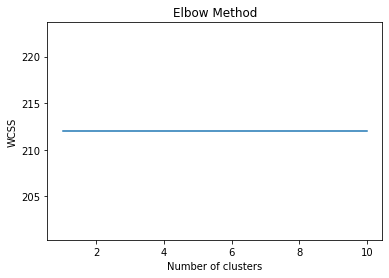

In [22]:
#determine the optimul number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=len(full_list), n_init=10, random_state=0)
    kmeans2.fit(full_list)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

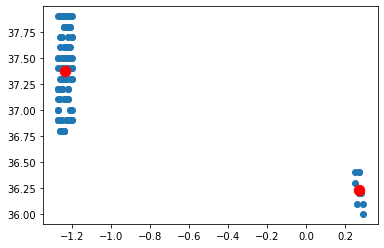

In [23]:
#determine the centroid for each cluster
kmeans2 = KMeans(n_clusters=2, init='k-means++', max_iter=len(full_list), n_init=10, random_state=0)
pred_y = kmeans2.fit_predict(full_list)
plt.scatter(full_list[:,0], full_list[:,1])
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=len(full_list), c='red')
plt.show()

In [24]:
centroids = kmeans2.cluster_centers_
centroids

array([[-1.2356, 37.372 ],
       [ 0.27  , 36.23  ]])

In [25]:
#pick the largest cluster using the length of labels
labels =list(kmeans2.labels_)
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [26]:
#get unique elements, and use as classes
classes = list(set(labels))
classes

[0, 1]

In [27]:
#find the largest cluster
unique = Counter(labels)
unique

Counter({1: 10, 0: 100})

In [28]:
bigger_cluster = max(unique, key=unique.get)
bigger_cluster

0

In [29]:
centroids[bigger_cluster]

array([-1.2356, 37.372 ])